## Distortion in Images

#### How to Measure Distortion
-> Use objects we know and have high gradients

CHESSBOARD!

1) Create a map that matches distorted image points to non-distorted image points

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import glob

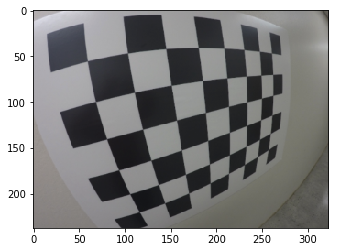

In [11]:
file = 'chessboard.jpg'
img = cv2.imread(file)
plt.imshow(img)

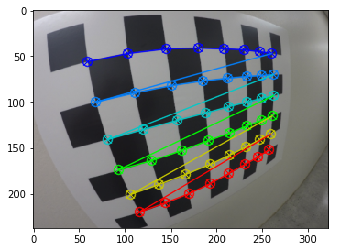

In [18]:
num_corners = (8, 6)

objpoints = []
imgpoints = []

objp = np.zeros((6*8, 3), np.float32)
objp[:,:2] = np.mgrid[0:8, 0:6].T.reshape(-1, 2)

gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

ret, corners = cv2.findChessboardCorners(gray, num_corners, None)

if ret == True:
    imgpoints.append(corners)
    objpoints.append(objp)
    
    img = cv2.drawChessboardCorners(img, num_corners, corners, ret)
    plt.imshow(img)

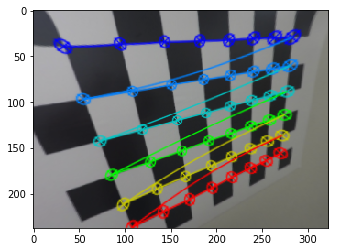

In [19]:
ret, mtx, dist, rvecs, tvecs = cv2.calibrateCamera(objpoints, imgpoints, gray.shape[::-1], None, None)
dst = cv2.undistort(img, mtx, dist, None, mtx)

plt.imshow(dst)